# Dataframer: Green's Odyssey to Pandas DF

Here are some transformation and frequencies for future exploratory analysis of Green's Odyssey.

Columns: author, year, title, book_num, text, num_lines, num_sentences, num_words, 


In [11]:
# READING FILE TO VARIABLE
filepath = "/Users/debr/odysseys_en/Normalized_txts/Odyssey_Green_Normalized_v2.txt"
with open(filepath, 'r') as file:
    lines = file.readlines()

text = "".join(lines)

In [12]:
import re

# Split the text at each "Book" occurrence
books = re.split(r'Book\s', text)

# Remove the first element (it's empty or contains text before the first "Book")
if books[0].strip() == "":
    books = books[1:]
else:
    print("Warning: There was text before the first 'Book'")

# Now 'books' contains each book's content without the "Book" prefix
print(len(books))  # Should be 24 if there are 24 books


24


In [13]:
import pandas as pd
import re

def odyssey_dataframer(author, year, title, list_books):
    """
    Splits a list_books into rows and creates a DataFrame.
    Args:
    list_books (list): The full text of the Odyssey
    author (str): Author name
    year (str): Publication year
    title (str): Book title
    Returns:
    pd.DataFrame: DataFrame with columns for author, year, title, book_num, and text
    """
    # Create a list to store the data for each book
    data = []
    
    # Loop through each book in the list
    for i, book_text in enumerate(list_books, 1):  # Start counting from 1
        # Add a row for this book
        data.append({
            'author': author,
            'year': year,
            'title': title,
            'book_num': i,
            'text': book_text
        })
    
    # Create the DataFrame from the data
    df = pd.DataFrame(data)
    
    return df


df = odyssey_dataframer("Green", "2018", "The Odyssey", books)
df

,author,year,title,book_num,text
0,Green,2018,The Odyssey,1,"\nThe man, Muse—tell me about that resourceful..."
1,Green,2018,The Odyssey,2,"\nWhen Dawn appeared, early risen and rosy-fin..."
2,Green,2018,The Odyssey,3,"\nDeserting the deep’s enchanting surface, the..."
3,Green,2018,The Odyssey,4,\nNow they came to deep-hollowed Lakedaimon wi...
4,Green,2018,The Odyssey,5,\nAs Dawn arose from her bed beside illustriou...
5,Green,2018,The Odyssey,6,"\nSo Odysseus slept on there, godlike and much..."
6,Green,2018,The Odyssey,7,"\nSo while Odysseus prayed there, godlike and ..."
7,Green,2018,The Odyssey,8,"\nWhen Dawn appeared, early risen and rosy-fin..."
8,Green,2018,The Odyssey,9,"\nThen resourceful Odysseus responded to him, ..."
9,Green,2018,The Odyssey,10,"\n“To the isle of Aiolia then we came, where w..."


In [14]:
import pandas as pd
import re

# Define functions to count lines, sentences, and words
def count_lines(text):
    """Function to count lines in a text by the number of newline characters.

    Args:
        text (string): The text to count lines in.

    Returns:
        integer: The number of lines in the text.
    """
    if pd.isna(text):  # Handle NaN values
        return 0
    return text.count('\n') + 1  # Count newlines, add 1 for the last line

def count_sentences(text):
    """Function to count sentences (using basic punctuation) in a text.

    Args:
        text (str): lines of the Odyssey 

    Returns:
        integer: number of sentences in the text
    """
    if pd.isna(text): # Handle NaN values
        return 0
    return len(re.split(r'[.!?]', text)) - 1  # - 1 skips the last part 

def count_words(text):
    """Count the number of words in a text 
    
    Args:
        text (str): lines of the Odyssey
        
        Returns:
        integer: number of words in the text
    """
    if pd.isna(text): # Handle NaN values
        return 0
    return len(re.findall(r'\b\w+\b', text))  # Match words using regex

# Apply functions & add new columns
df['num_lines'] = df['text'].apply(count_lines)
df['num_sentences'] = df['text'].apply(count_sentences)
df['num_words'] = df['text'].apply(count_words)

df

,author,year,title,book_num,text,num_lines,num_sentences,num_words
0,Green,2018,The Odyssey,1,"\nThe man, Muse—tell me about that resourceful...",448,150,4644
1,Green,2018,The Odyssey,2,"\nWhen Dawn appeared, early risen and rosy-fin...",436,150,4522
2,Green,2018,The Odyssey,3,"\nDeserting the deep’s enchanting surface, the...",499,163,5181
3,Green,2018,The Odyssey,4,\nNow they came to deep-hollowed Lakedaimon wi...,852,268,8864
4,Green,2018,The Odyssey,5,\nAs Dawn arose from her bed beside illustriou...,497,144,5142
5,Green,2018,The Odyssey,6,"\nSo Odysseus slept on there, godlike and much...",333,112,3460
6,Green,2018,The Odyssey,7,"\nSo while Odysseus prayed there, godlike and ...",351,104,3529
7,Green,2018,The Odyssey,8,"\nWhen Dawn appeared, early risen and rosy-fin...",591,167,6011
8,Green,2018,The Odyssey,9,"\nThen resourceful Odysseus responded to him, ...",572,189,5950
9,Green,2018,The Odyssey,10,"\n“To the isle of Aiolia then we came, where w...",580,218,6010


In [15]:
%matplotlib inline
import sys
import os
import matplotlib.pyplot as plt
# Add the directory containing visualization_utils.py to path
sys.path.append("/Users/debr/English-Homer/")
import visualization_utils as viz




In [16]:
import seaborn as sns
sns.set_style("whitegrid")
# palette astroblue   orange   genoa      carrot    tawny     neptune      SELAGO    mako   black
color = ['#003D59', '#FD6626','#177070','#FB871D','#641B5E','#86C3BC','#F5E1FD','#414A4F','k']
danB_plotstyle = {'figure.figsize': (12, 7), 
               'axes.labelsize': 'large', # fontsize for x and y labels (was large)
               'axes.titlesize': 'large', # fontsize for title
               'axes.titleweight': 'bold', # font type for title
               'xtick.labelsize': 'large', # fontsize for x 
               'ytick.labelsize':'small', # fontsize fory ticks
               'grid.color': 'k', # grid color
                'grid.linestyle': ':', # grid line style
                'grid.linewidth': 0.2, # grid line width
                'font.family': 'Times New Roman', # font family
                'grid.alpha': 0.5, # transparency of grid
               'figure.dpi': 300, # figure display resolution
               'savefig.bbox': 'tight', # tight bounding box
               'savefig.pad_inches': 0.4, # padding to use when saving
               'axes.titlepad': 15, # title padding
               'axes.labelpad': 8, # label padding
               'legend.borderpad': .6, # legend border padding
               'axes.prop_cycle': plt.cycler(
                color=color) # color cycle for plot lines
               }

# adjust matplotlib defaults
plt.rcParams.update(danB_plotstyle)

Figure saved to /Users/debr/English-Homer/dataframers_by_author/plots/Green-sentence_freq.png


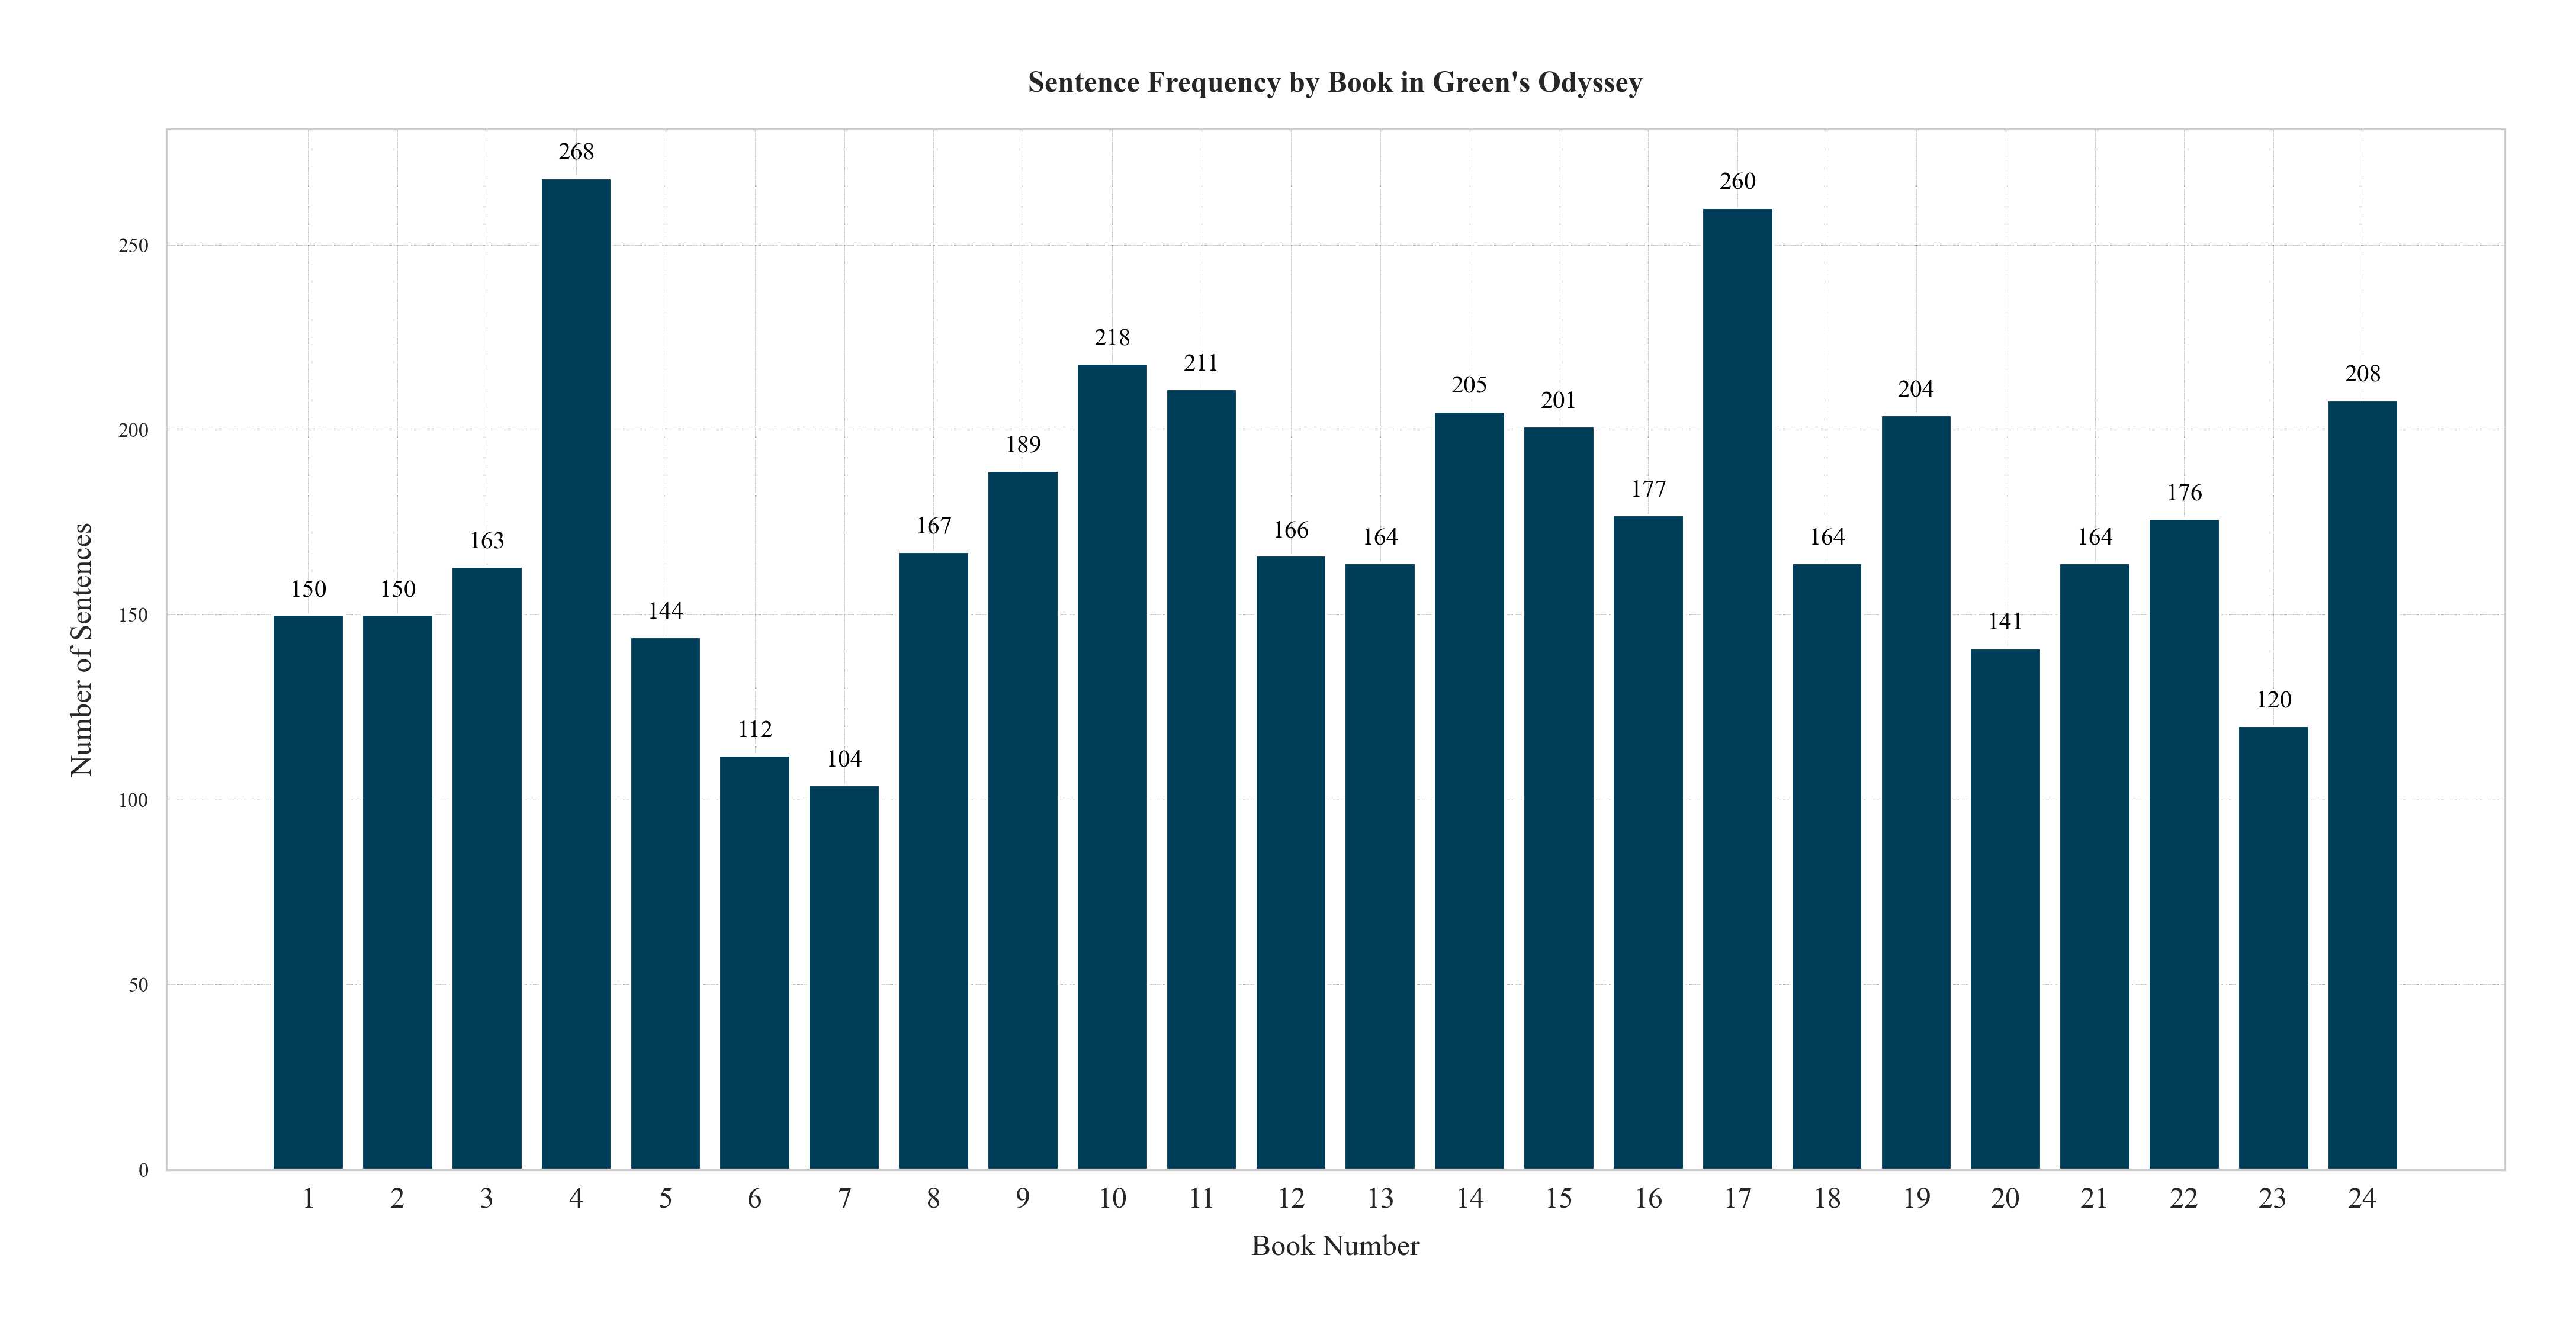

In [17]:
# Group by book_num and count the number of sentences in each book
sentences_per_book = df.groupby('book_num')['num_sentences'].sum()

# Create the plot using predefined styles
fig, ax = plt.subplots(figsize=(14, 7))

# Use predefined color cycle from viz.COLORS
ax.bar(sentences_per_book.index, sentences_per_book.values)  # Use 'orange'

ax.set_xlabel('Book Number')
ax.set_ylabel('Number of Sentences')
ax.set_title("Sentence Frequency by Book in Green's Odyssey")

# Ensure all book numbers are shown on the x-axis
ax.set_xticks(sentences_per_book.index)

# Grid styling from viz
ax.grid(axis='y', alpha=0.5)
# Add values on top of bars
for i, v in enumerate(sentences_per_book.values):
    ax.text(i + 1, v + 5, str(v), ha='center', fontsize=10, color='black')

# Apply tight layout
plt.tight_layout()

# Save the figure using the predefined function
viz.save_figure(fig, "/Users/debr/English-Homer/dataframers_by_author/plots/Green-sentence_freq.png")

Figure saved to /Users/debr/English-Homer/dataframers_by_author/plots/Green-lines_freq.png


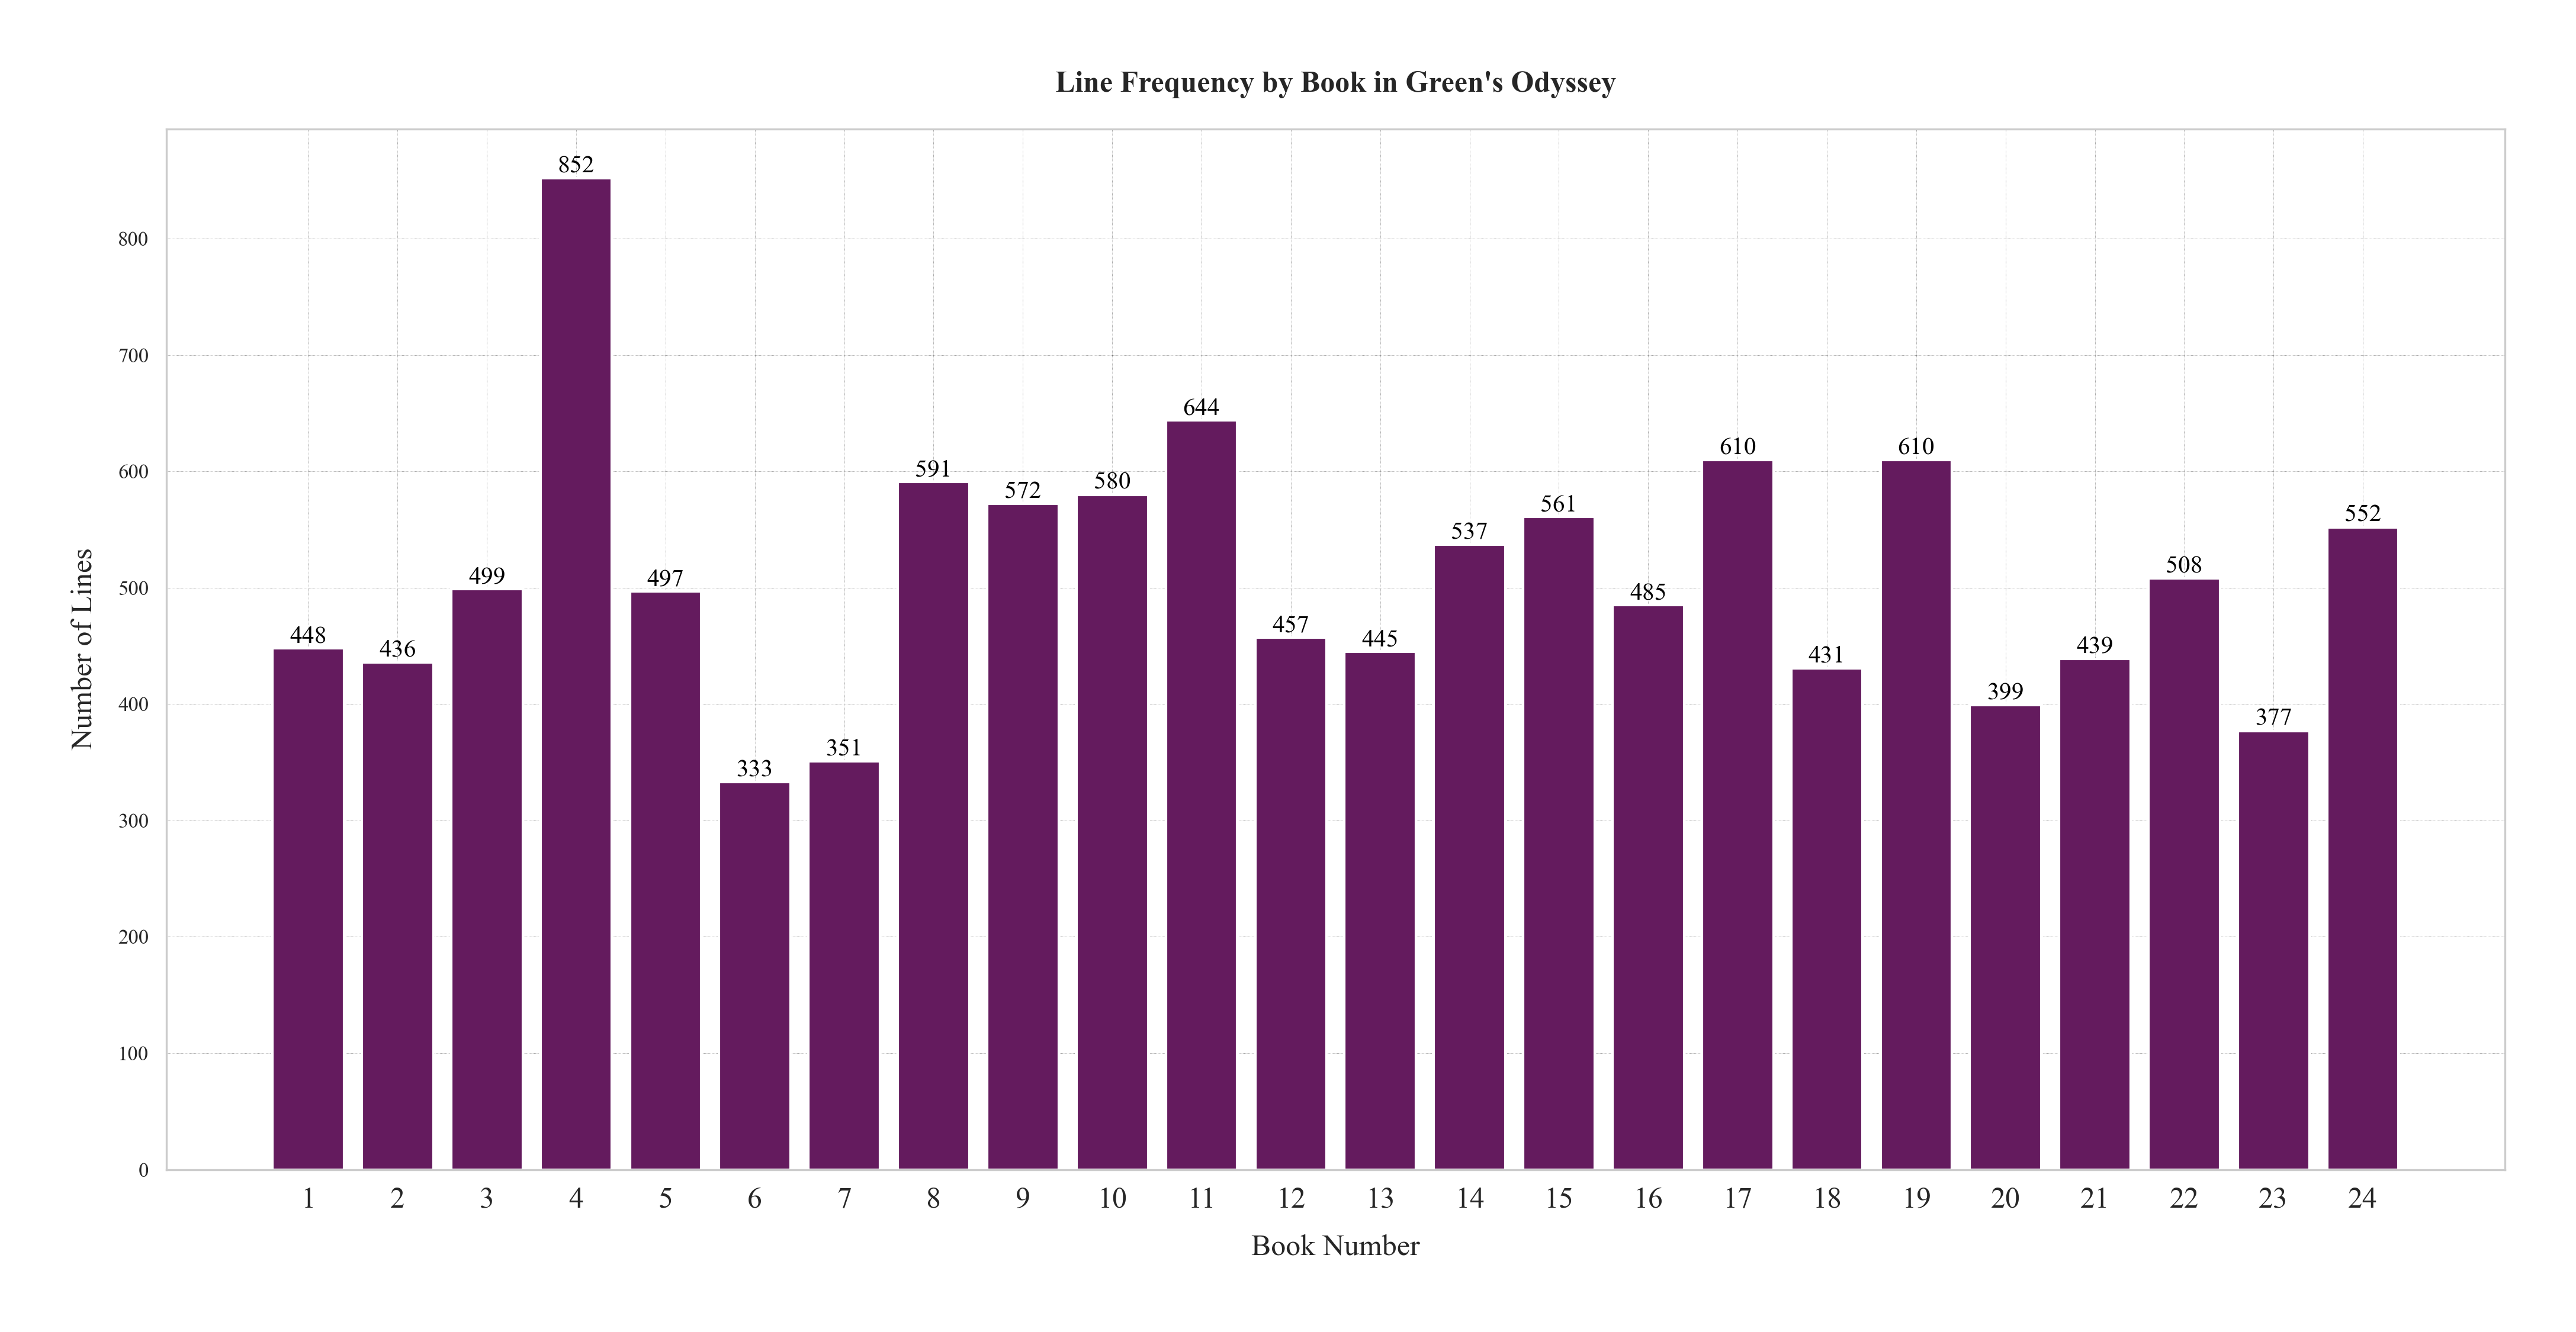

In [18]:
# Group by book_num and count the number of lines in each book
lines_per_book = df.groupby('book_num')['num_lines'].sum()

# Create the plot using predefined styles
fig, ax = plt.subplots(figsize=(14, 7))

# Use predefined color cycle from viz.COLORS
ax.bar(lines_per_book.index, lines_per_book.values, color='#641B5E')  # Use 'orange'

ax.set_xlabel('Book Number')
ax.set_ylabel('Number of Lines')
ax.set_title("Line Frequency by Book in Green's Odyssey")

# Ensure all book numbers are shown on the x-axis
ax.set_xticks(lines_per_book.index)

# Grid styling from viz
ax.grid(axis='y', alpha=0.5)
# Add values on top of bars
for i, v in enumerate(lines_per_book.values):
    ax.text(i + 1, v + 5, str(v), ha='center', fontsize=10, color='black')

# Apply tight layout
plt.tight_layout()

# Save the figure using the predefined function
viz.save_figure(fig, "/Users/debr/English-Homer/dataframers_by_author/plots/Green-lines_freq.png")

Figure saved to /Users/debr/English-Homer/dataframers_by_author/plots/Green-words_freq_bB.png


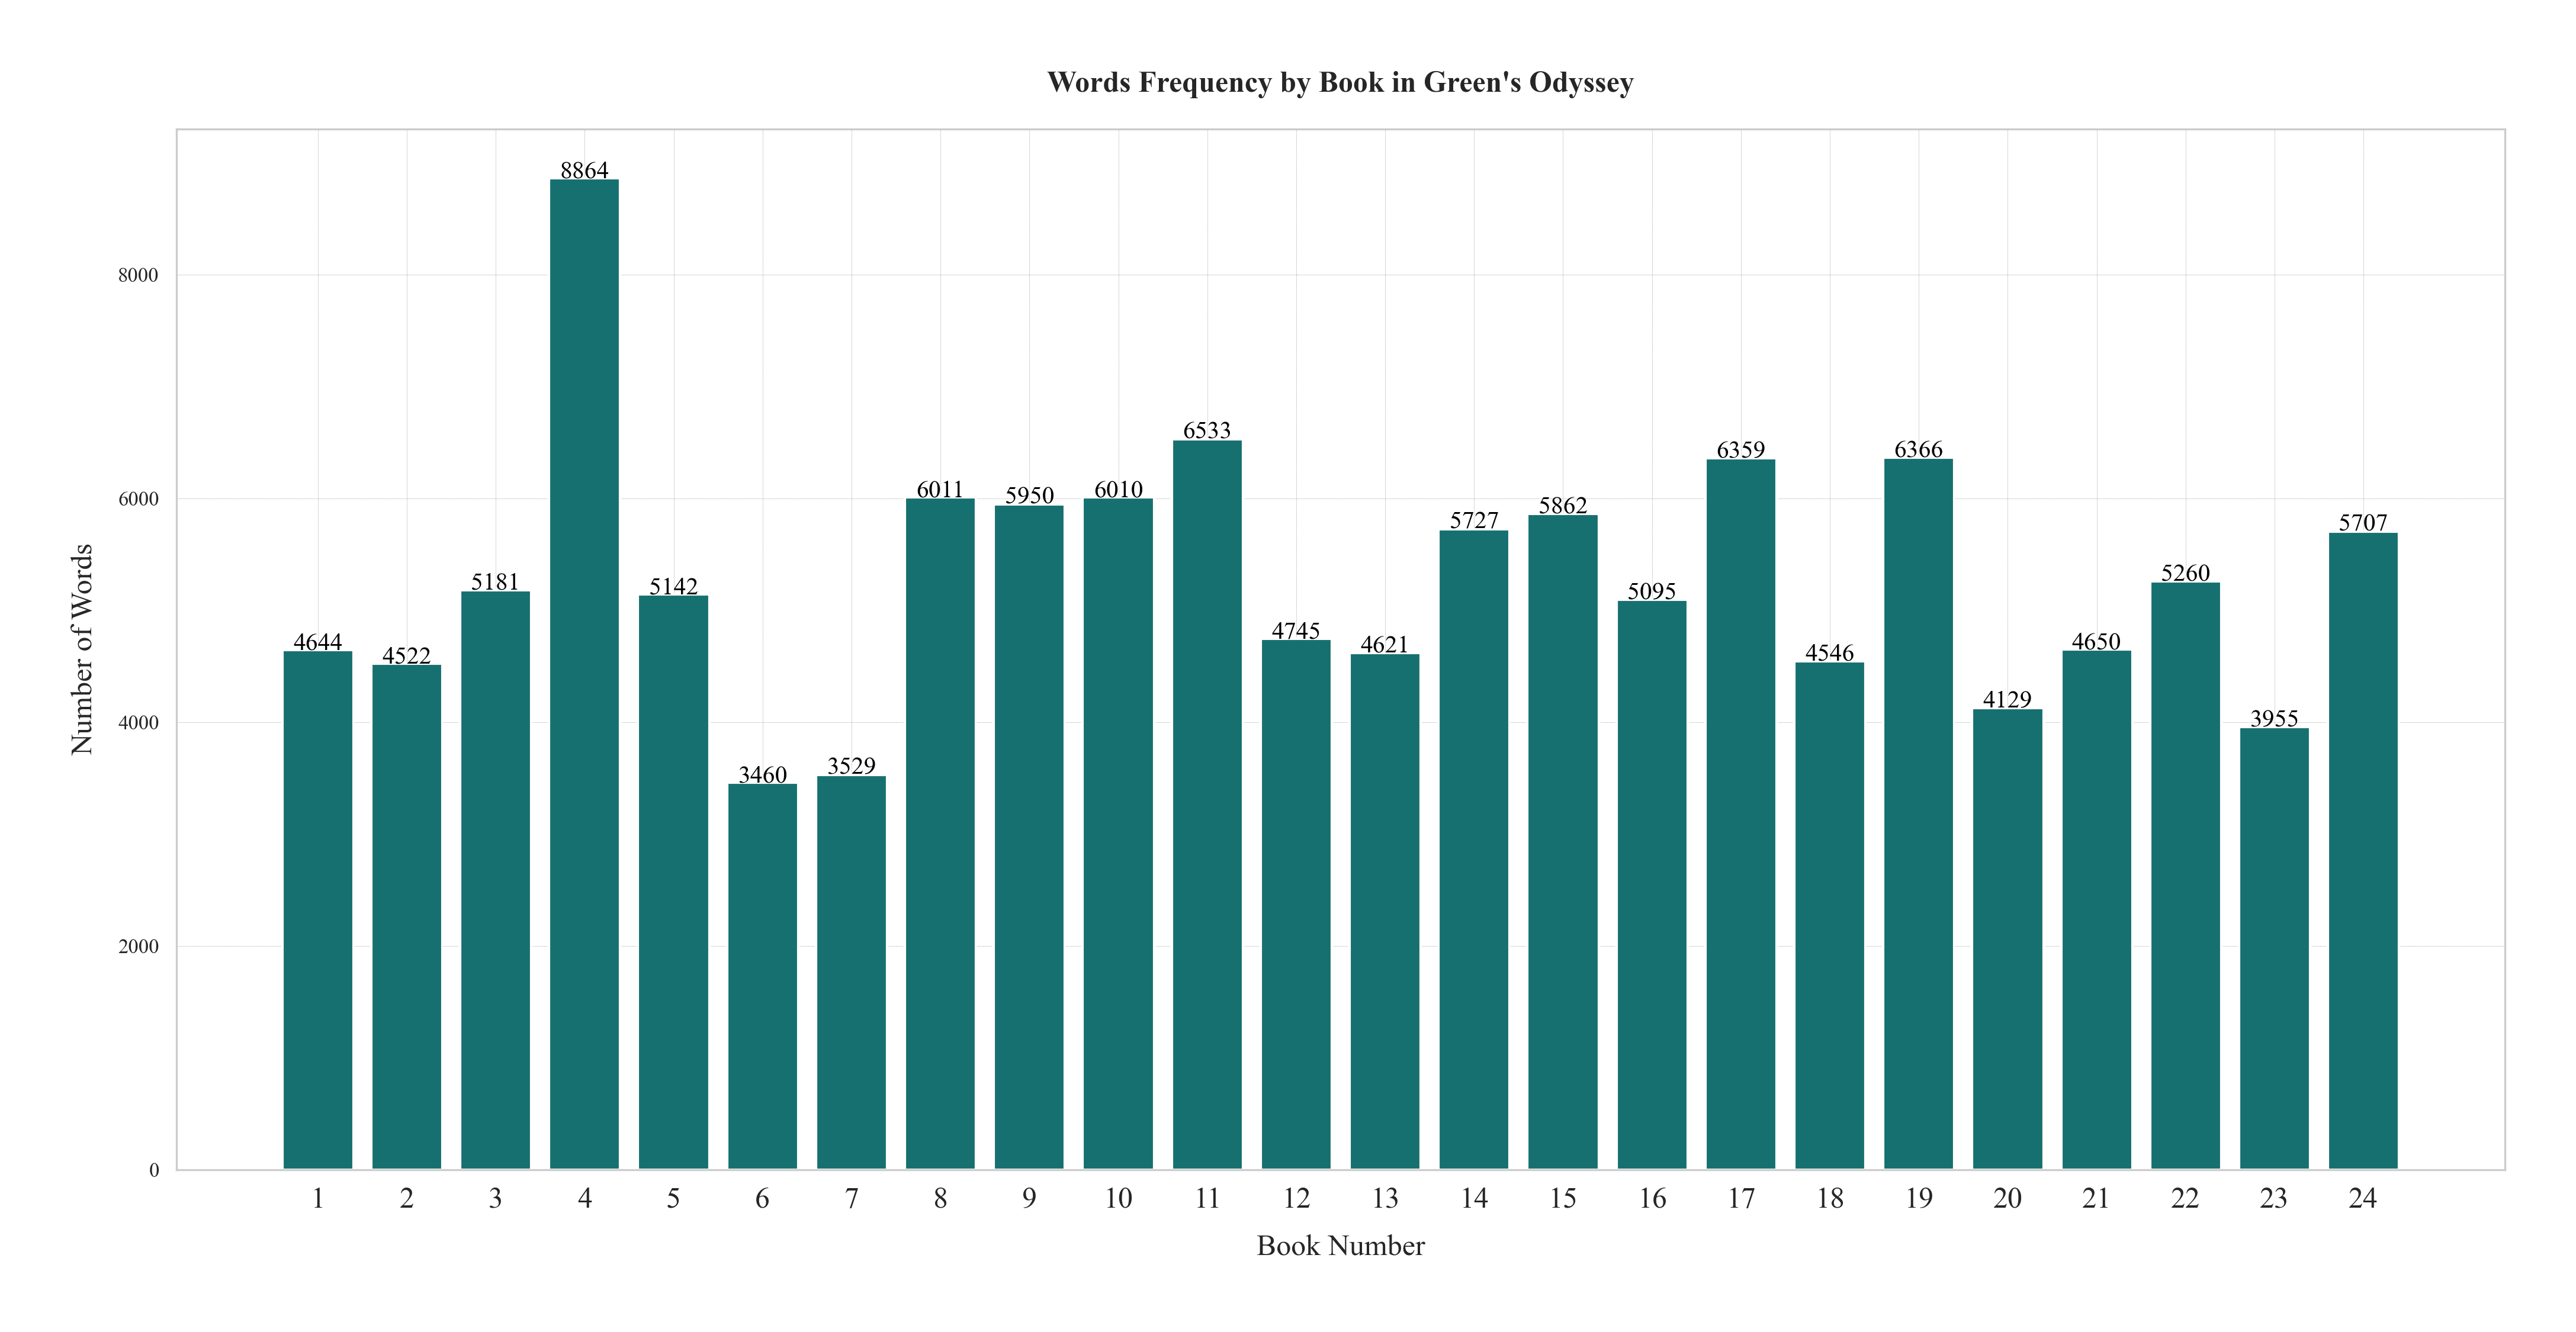

In [19]:
# Group by book_num and count the number of words in each book
words_per_book = df.groupby('book_num')['num_words'].sum()

# Create the plot using predefined styles
fig, ax = plt.subplots(figsize=(14, 7))

# Use predefined color cycle from viz.COLORS
ax.bar(words_per_book.index, words_per_book.values, color='#177070')  # Use 'orange'

ax.set_xlabel('Book Number')
ax.set_ylabel('Number of Words')
ax.set_title("Words Frequency by Book in Green's Odyssey")

# Ensure all book numbers are shown on the x-axis
ax.set_xticks(words_per_book.index)

# Grid styling from viz
ax.grid(axis='y', alpha=0.5)
# Add values on top of bars
for i, v in enumerate(words_per_book.values):
    ax.text(i + 1, v + 5, str(v), ha='center', fontsize=10, color='black')

# Apply tight layout
plt.tight_layout()

# Save the figure using the predefined function
viz.save_figure(fig, "/Users/debr/English-Homer/dataframers_by_author/plots/Green-words_freq_bB.png")

In [20]:
books_first_lines = {
    'Book 1': 'The man, Muse—tell me about that resourceful man, who wandered',
    'Book 2': 'When Dawn appeared, early risen and rosy-fingered,',
    'Book 3': "Deserting the deep’s enchanting surface, the sun rose up",
    'Book 4': 'Now they came to deep-hollowed Lakedaimon with its ravines',
    'Book 5': 'As Dawn arose from her bed beside illustrious Tithonos,',
    'Book 6': 'So Odysseus slept on there, godlike and much-enduring,',
    'Book 7': 'So while Odysseus prayed there, godlike and much-enduring,',
    'Book 8': 'When Dawn appeared, early risen and rosy-fingered,',
    'Book 9': 'Then resourceful Odysseus responded to him, saying:',
    'Book 10': '“To the isle of Aiolia then we came, where was the dwelling',
    'Book 11': '“But when we came down to the ship and the sea, first off',
    'Book 12': '“After our ship left the course of Ocean’s river and came',
    'Book 13': 'So he spoke: every one of them sat hushed and silent,',
    'Book 14': 'But the rough path up from the harbor was that which Odysseus',
    'Book 15': 'Now Pallas Athene was gone to spacious Lakedaimon,',
    'Book 16': 'The two in the hut, Odysseus and the noble swineherd,',
    'Book 17': 'When Dawn appeared, early risen and rosy-fingered,',
    'Book 18': 'Now there came up a public beggar, whose custom it was to beg',
    'Book 19': 'So noble Odysseus was left behind, there in the hall,',
    'Book 20': 'But noble Odysseus bedded down for sleep in the forecourt.',
    'Book 21': 'The goddess, grey-eyed Athene, now put it into the mind',
    'Book 22': 'Now resourceful Odysseus stripped himself of his rags',
    'Book 23': 'Chuckling, the old woman ascended to the upper chamber,',
    'Book 24': 'Hermes, god of Kyllene, now summoned forth the ghosts'
}

In [21]:
# Create output directory if it doesn't exist
output_filepath = "/Users/debr/odysseys_en/Odyssey_dfs/Odyssey_Green_eda.csv"
os.makedirs(os.path.dirname(output_filepath), exist_ok=True)

# save df to csv
df.to_csv(output_filepath, index=False)

